In [ ]:
import tensorflow as tf
import cv2
import os #for folder opening
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
img_array=cv2.imread("/content/train/angry/Training_10118481.jpg")

In [ ]:
img_array.shape #rgb channels

(48, 48, 3)

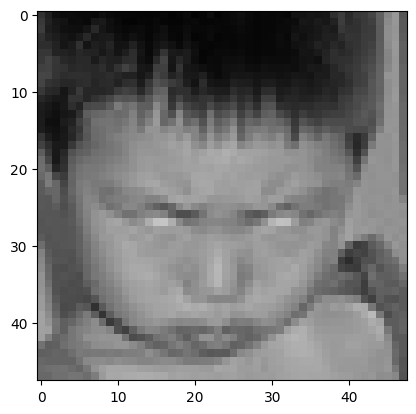

In [ ]:
plt.imshow(img_array)

In [ ]:
classes=["angry","disgust","fear","happy","neutral","sad","surprise"]

In [ ]:
Datadirectory="/content/train"#training dataset

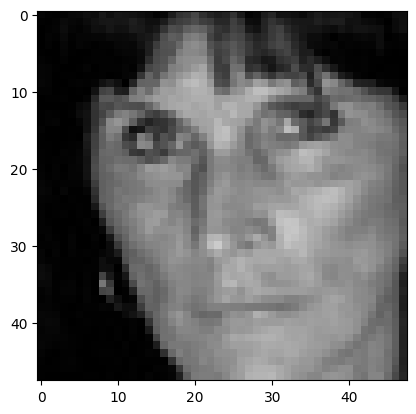

In [ ]:
for categories in classes:
  path=os.path.join(Datadirectory,categories)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break   

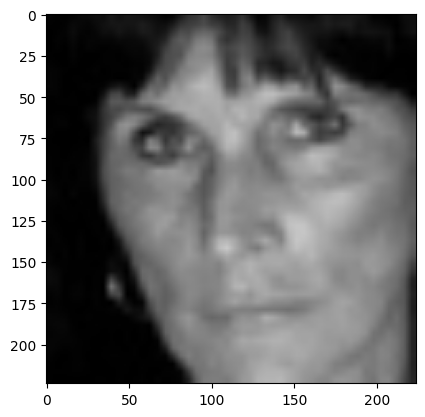

In [ ]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
#Read all the images and convert them to array

In [ ]:
training_data=[]

def create_training_Data():
  for category in classes:
    path=os.path.join(Datadirectory,category)
    class_num=classes.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_Data()

In [ ]:
training_data[5000]

[array([[[19, 19, 19],
         [19, 19, 19],
         [19, 19, 19],
         ...,
         [30, 30, 30],
         [31, 31, 31],
         [31, 31, 31]],
 
        [[19, 19, 19],
         [19, 19, 19],
         [19, 19, 19],
         ...,
         [30, 30, 30],
         [31, 31, 31],
         [31, 31, 31]],
 
        [[19, 19, 19],
         [19, 19, 19],
         [19, 19, 19],
         ...,
         [30, 30, 30],
         [31, 31, 31],
         [31, 31, 31]],
 
        ...,
 
        [[52, 52, 52],
         [52, 52, 52],
         [52, 52, 52],
         ...,
         [69, 69, 69],
         [69, 69, 69],
         [69, 69, 69]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [69, 69, 69],
         [69, 69, 69],
         [69, 69, 69]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [52, 52, 52],
         ...,
         [69, 69, 69],
         [69, 69, 69],
         [69, 69, 69]]], dtype=uint8),
 2]

In [ ]:
len(training_data)

28709

In [ ]:
#we are just using training data because of real time detection

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
#normalize or scaling the data

In [ ]:
x[0]

array([[[166, 166, 166],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [ 56,  56,  56],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[166, 166, 166],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [ 56,  56,  56],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[166, 166, 166],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 28709 files belonging to 7 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)


In [ ]:
Y=np.array(y)

In [ ]:
Y.shape

(28709,)

In [ ]:
#deep learning model for training -Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
#tunning and weighting of model

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
#add new layer to second last model results as last layer gives 1000 classes and we need only 7 so we excluded last layer
final_output=layers.Dense(128)(base_output) 
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)#output is in 7 classes ##output layer

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
new_model.fit(train_ds,epochs=2)

Epoch 1/2
898/898 [==============================] - 165s 132ms/step - loss: 1.2447 - accuracy: 0.5291
Epoch 2/2
898/898 [==============================] - 118s 131ms/step - loss: 1.0681 - accuracy: 0.6018


In [ ]:
new_model.save('my_model_2.h5')

In [ ]:
#TESTING OUR MODEL

In [ ]:
m=tf.keras.models.load_model('my_model_2.h5')

In [ ]:
fr=cv2.imread("/content/happy2.jpeg")

In [ ]:
fr.shape

(201, 251, 3)

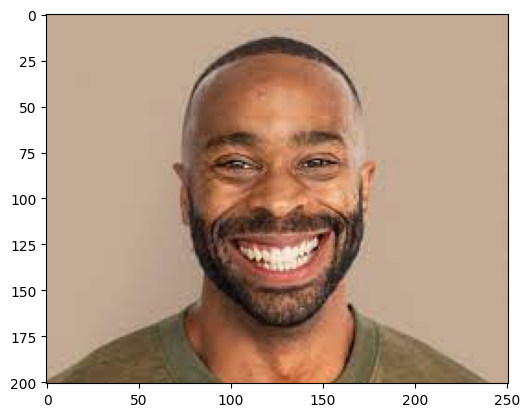

In [ ]:
plt.imshow(cv2.cvtColor(fr,cv2.COLOR_BGR2RGB))

In [ ]:
#WE NEED FACE DETECTION ALGORITHM 

In [ ]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/face_frontial.xml')

In [ ]:
gray=cv2.cvtColor(fr,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(201, 251)

In [ ]:
from imutils import paths
import cv2
from google.colab.patches import cv2_imshow



In [ ]:
faceCascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


In [ ]:
faces = faceCascade. detectMultiScale (fr,1.1,4)
for x,y,w,h in faces:
 roi_gray = gray[y:y+h, x:x+w]
 roi_color = fr [y:y+h, x:x+w]
 cv2.rectangle(fr, (x, y), (x+w, y+h), (255, 0, 0), 3)
 facess = faceCascade.detectMultiScale (roi_gray)
 if len(facess) == 0:
    print ("Face not detected")
 else:
   for (ex, ey, ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh, ex:ex + ew]

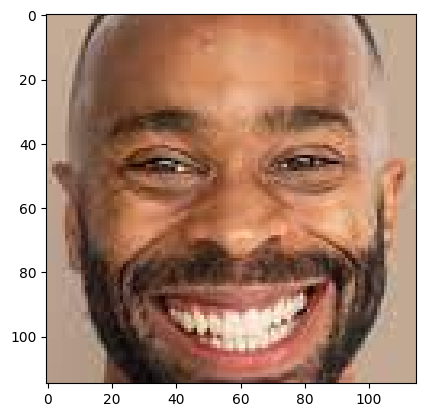

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image =cv2.resize(face_roi, (224,224)) ##
final_image = np.expand_dims (final_image,axis =0) ## need fourth dimension
final_image=final_image/255.0 ## normalizing

In [ ]:
Predictions =m.predict(final_image)

1/1 [==============================] - 0s 42ms/step


In [ ]:
Predictions[0]

array([1.8523414e-02, 2.8141082e-04, 2.5425858e-03, 9.6091539e-01,
       1.3269574e-02, 7.8989274e-04, 3.6776417e-03], dtype=float32)